In [1]:
#import dependencies
import pandas as pd
import requests
import time
import json
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# API - Projections 2020 Week 1

In [ ]:
#week 1
query_url = f"https://api.sportsdata.io/v3/nfl/projections/json/PlayerGameProjectionStatsByWeek/2020REG/1?key=4339cb9aa27441699f1883848f498899"
response = requests.get(query_url).json()
print(json.dumps(response[0],indent=1))

In [ ]:
wk1_df = pd.DataFrame(columns=["Week","PlayerID", "Name","Team", "Position", "Activated", "Played", "Started", "FantasyPoints", "FantasyPointsPPR", "OpponentRank", "OpponentPositionRank"])
# wk1_df = pd.DataFrame(columns=["PlayerID"])
wk1_df

In [ ]:
for i in range(0,len(response)):
    currentItem = response[i]
#     wk1_df.loc[i] = [response[i]["PlayerID"]]
    wk1_df.loc[i] = [response[i]["Week"],response[i]["PlayerID"], response[i]["Name"],response[i]["Team"], response[i]["Position"], response[i]["Activated"], response[i]["Played"], response[i]["Started"], response[i]["FantasyPoints"], response[i]["FantasyPointsPPR"], response[i]["OpponentRank"], response[i]["OpponentPositionRank"]]

In [ ]:
#week 1
wk1_df

# Cleansed Data - Greater than 20 Pts

In [ ]:
CleanData = pd.read_csv('TBG_EXCEL_FILES/CLEAN_DATA_2020_GREAT_20_PTS.csv')
CleanData.head()

In [ ]:
CleanData.dtypes

In [ ]:
 # Assign the data to X and y

X = CleanData[["Proj_Pts_2020", "Played_ACTUAL","Started-Actual","Act_Opponent_Position_Rank_2020"]]
y = CleanData["Change_Proj_Act_Pts_2020"].values.reshape(-1, 1)
print(X.shape, y.shape)

In [ ]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [ ]:
 # Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [ ]:
 # Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

In [ ]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), y_train - model.predict(X_train), c="blue", label="Training Data")
plt.scatter(model.predict(X_test), y_test - model.predict(X_test), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

# 2020 WK 1 Actuals New Data

In [2]:
# week 1  Actual

query_url = f"https://api.sportsdata.io/v3/nfl/stats/json/PlayerGameStatsByWeek/2020reg/1?key=3b5fde40e15048148341780099372fc3"
response_1a = requests.get(query_url).json()
print(json.dumps(response_1a[0],indent=1))

{
 "GameKey": "202010105",
 "PlayerID": 20824,
 "SeasonType": 1,
 "Season": 2020,
 "GameDate": "2020-09-13T13:00:00",
 "Week": 1,
 "Team": "LV",
 "Opponent": "CAR",
 "HomeOrAway": "AWAY",
 "Number": 28,
 "Name": "Josh Jacobs",
 "Position": "RB",
 "PositionCategory": "OFF",
 "Activated": 1,
 "Played": 1,
 "Started": 1,
 "PassingAttempts": 0.0,
 "PassingCompletions": 0.0,
 "PassingYards": 0.0,
 "PassingCompletionPercentage": 0.0,
 "PassingYardsPerAttempt": 0.0,
 "PassingYardsPerCompletion": 0.0,
 "PassingTouchdowns": 0.0,
 "PassingInterceptions": 0.0,
 "PassingRating": 0.0,
 "PassingLong": 0.0,
 "PassingSacks": 0.0,
 "PassingSackYards": 0.0,
 "RushingAttempts": 35.6,
 "RushingYards": 132.4,
 "RushingYardsPerAttempt": 7.5,
 "RushingTouchdowns": 6.1,
 "RushingLong": 19.9,
 "ReceivingTargets": 12.2,
 "Receptions": 8.1,
 "ReceivingYards": 65.5,
 "ReceivingYardsPerReception": 16.4,
 "ReceivingTouchdowns": 0.0,
 "ReceivingLong": 41.3,
 "Fumbles": 0.0,
 "FumblesLost": 0.0,
 "PuntReturns": 0.0,


In [3]:
wk1act_df = pd.DataFrame(columns=["Week", "Name","FantasyPoints"])
# wk1_df = pd.DataFrame(columns=["PlayerID"])
wk1act_df 
for i in range(0,len(response_1a)):
    currentItem = response_1a[i]
#     wk1_df.loc[i] = [response[i]["PlayerID"]]
    wk1act_df.loc[i] = [response_1a[i]["Week"],response_1a[i]["Name"], response_1a[i]["FantasyPoints"]]
wk1act_df.head()

,Week,Name,FantasyPoints
0,1,Josh Jacobs,45.4
1,1,Russell Wilson,45.3
2,1,Aaron Rodgers,43.8
3,1,Josh Allen,40.1
4,1,Davante Adams,39.3


In [4]:
wk1act_df = wk1act_df.rename(columns={"FantasyPoints": "ActFantasyPoints"})
wk1act_df

,Week,Name,ActFantasyPoints
0,1,Josh Jacobs,45.4
1,1,Russell Wilson,45.3
2,1,Aaron Rodgers,43.8
3,1,Josh Allen,40.1
4,1,Davante Adams,39.3
...,...,...,...
1804,1,Nick Vannett,-0.9
1805,1,Patrick Ricard,-1.7
1806,1,Sharrod Neasman,-2.6
1807,1,Mike Edwards,-2.8


# 2020 WK 1 Projected New Data

In [5]:
#week 1 Projected
query_url = f"https://api.sportsdata.io/v3/nfl/projections/json/PlayerGameProjectionStatsByWeek/2020REG/1?key=4339cb9aa27441699f1883848f498899"
response = requests.get(query_url).json()
print(json.dumps(response[0],indent=1))

{
 "GameKey": "202010103",
 "PlayerID": 19781,
 "SeasonType": 1,
 "Season": 2020,
 "GameDate": "2020-09-13T13:00:00",
 "Week": 1,
 "Team": "BAL",
 "Opponent": "CLE",
 "HomeOrAway": "HOME",
 "Number": 8,
 "Name": "Lamar Jackson",
 "Position": "QB",
 "PositionCategory": "OFF",
 "Activated": 1,
 "Played": 1,
 "Started": 1,
 "PassingAttempts": 22.4,
 "PassingCompletions": 13.7,
 "PassingYards": 165.7,
 "PassingCompletionPercentage": 42.2,
 "PassingYardsPerAttempt": 3.7,
 "PassingYardsPerCompletion": 6.2,
 "PassingTouchdowns": 1.0,
 "PassingInterceptions": 0.4,
 "PassingRating": 63.7,
 "PassingLong": 0.0,
 "PassingSacks": 0.0,
 "PassingSackYards": 0.0,
 "RushingAttempts": 6.2,
 "RushingYards": 42.0,
 "RushingYardsPerAttempt": 2.5,
 "RushingTouchdowns": 0.2,
 "RushingLong": 0.0,
 "ReceivingTargets": 0.0,
 "Receptions": 0.0,
 "ReceivingYards": 0.0,
 "ReceivingYardsPerReception": 0.0,
 "ReceivingTouchdowns": 0.0,
 "ReceivingLong": 0.0,
 "Fumbles": 0.1,
 "FumblesLost": 0.1,
 "PuntReturns": 0.0,

In [6]:
wk1proj_df = pd.DataFrame(columns=["Week","PlayerID", "Name","Team", "Position", "PassingYards", "Played", "PassingTouchdowns", "PassingInterceptions", "RushingTouchdowns", "ReceivingYards", "OpponentPositionRank","FantasyPoints"])
# wk1_df = pd.DataFrame(columns=["PlayerID"])
wk1proj_df 
for i in range(0,len(response_1a)):
    currentItem = response_1a[i]
#     wk1_df.loc[i] = [response[i]["PlayerID"]]
    wk1proj_df.loc[i] = [response_1a[i]["Week"],response_1a[i]["PlayerID"], 
                         response_1a[i]["Name"],response_1a[i]["Team"], response_1a[i]["Position"], 
                         response_1a[i]["PassingYards"], response_1a[i]["Played"], response_1a[i]["PassingTouchdowns"], 
                         response_1a[i]["PassingInterceptions"], response_1a[i]["RushingTouchdowns"], 
                         response_1a[i]["ReceivingYards"], response_1a[i]["OpponentPositionRank"], response_1a[i]["FantasyPoints"]]
wk1proj_df.head()

,Week,PlayerID,Name,Team,Position,PassingYards,Played,PassingTouchdowns,PassingInterceptions,RushingTouchdowns,ReceivingYards,OpponentPositionRank,FantasyPoints
0,1,20824,Josh Jacobs,LV,RB,0.0,1,0.0,0.0,6.1,65.5,46,45.4
1,1,14536,Russell Wilson,SEA,QB,458.5,1,8.1,0.0,0.0,0.0,36,45.3
2,1,2593,Aaron Rodgers,GB,QB,518.3,1,8.1,0.0,0.0,0.0,11,43.8
3,1,19801,Josh Allen,BUF,QB,444.3,1,4.1,0.0,2.0,0.0,24,40.1
4,1,16470,Davante Adams,GB,WR,0.0,1,0.0,0.0,0.0,222.1,34,39.3


In [7]:
wk1proj_df = wk1proj_df.rename(columns={"FantasyPoints": "ProjFantasyPoints"})
wk1proj_df

,Week,PlayerID,Name,Team,Position,PassingYards,Played,PassingTouchdowns,PassingInterceptions,RushingTouchdowns,ReceivingYards,OpponentPositionRank,ProjFantasyPoints
0,1,20824,Josh Jacobs,LV,RB,0.0,1,0.0,0.0,6.1,65.5,46,45.4
1,1,14536,Russell Wilson,SEA,QB,458.5,1,8.1,0.0,0.0,0.0,36,45.3
2,1,2593,Aaron Rodgers,GB,QB,518.3,1,8.1,0.0,0.0,0.0,11,43.8
3,1,19801,Josh Allen,BUF,QB,444.3,1,4.1,0.0,2.0,0.0,24,40.1
4,1,16470,Davante Adams,GB,WR,0.0,1,0.0,0.0,0.0,222.1,34,39.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804,1,18019,Nick Vannett,DEN,TE,0.0,1,0.0,0.0,0.0,-8.5,38,-0.9
1805,1,19209,Patrick Ricard,BAL,FB,0.0,1,0.0,0.0,0.0,12.8,36,-1.7
1806,1,18467,Sharrod Neasman,ATL,FS,0.0,1,0.0,0.0,0.0,0.0,None,-2.6
1807,1,20748,Mike Edwards,TB,FS,0.0,1,0.0,0.0,0.0,0.0,None,-2.8


In [8]:
wk1proj_df['Position'].unique()

array(['RB', 'QB', 'WR', 'FS', 'LB', 'CB', 'TE', 'SS', 'OLB', 'DE', 'ILB',
       'DT', 'K', 'DL', 'NT', 'DB', 'S', 'FB', 'LS', 'P', 'G', 'OT', 'C',
       'OL'], dtype=object)

In [14]:
wk1proj_dropdef = wk1proj_df[wk1proj_df['Position'].isin(['RB', 'QB', 'WR','TE'])]

In [15]:
new_df = pd.merge(wk1act_df, wk1proj_dropdef,  how='left', left_on=['Name','Week'], right_on = ['Name','Week'])
new_df

,Week,Name,ActFantasyPoints,PlayerID,Team,Position,PassingYards,Played,PassingTouchdowns,PassingInterceptions,RushingTouchdowns,ReceivingYards,OpponentPositionRank,ProjFantasyPoints
0,1,Josh Jacobs,45.4,20824,LV,RB,0.0,1,0.0,0.0,6.1,65.5,46,45.4
1,1,Russell Wilson,45.3,14536,SEA,QB,458.5,1,8.1,0.0,0.0,0.0,36,45.3
2,1,Aaron Rodgers,43.8,2593,GB,QB,518.3,1,8.1,0.0,0.0,0.0,11,43.8
3,1,Josh Allen,40.1,19801,BUF,QB,444.3,1,4.1,0.0,2.0,0.0,24,40.1
4,1,Davante Adams,39.3,16470,GB,WR,0.0,1,0.0,0.0,0.0,222.1,34,39.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1806,1,Nick Vannett,-0.9,18019,DEN,TE,0.0,1,0.0,0.0,0.0,-8.5,38,-0.9
1807,1,Patrick Ricard,-1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1808,1,Sharrod Neasman,-2.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1809,1,Mike Edwards,-2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
new_df.count()

Week                    1811
Name                    1811
ActFantasyPoints        1811
PlayerID                 535
Team                     535
Position                 535
PassingYards             535
Played                   535
PassingTouchdowns        535
PassingInterceptions     535
RushingTouchdowns        535
ReceivingYards           535
OpponentPositionRank     535
ProjFantasyPoints        535
dtype: int64

In [17]:
new_df.isnull().values.any()

True

In [18]:
new_df['PassingYards'].isnull().values.any()

True

In [19]:
new_df['ActFantasyPoints'].isnull().values.any()

False

In [20]:
ProjVsAct_df = new_df[new_df['OpponentPositionRank'].notna()]
ProjVsAct_df

,Week,Name,ActFantasyPoints,PlayerID,Team,Position,PassingYards,Played,PassingTouchdowns,PassingInterceptions,RushingTouchdowns,ReceivingYards,OpponentPositionRank,ProjFantasyPoints
0,1,Josh Jacobs,45.4,20824,LV,RB,0.0,1,0.0,0.0,6.1,65.5,46,45.4
1,1,Russell Wilson,45.3,14536,SEA,QB,458.5,1,8.1,0.0,0.0,0.0,36,45.3
2,1,Aaron Rodgers,43.8,2593,GB,QB,518.3,1,8.1,0.0,0.0,0.0,11,43.8
3,1,Josh Allen,40.1,19801,BUF,QB,444.3,1,4.1,0.0,2.0,0.0,24,40.1
4,1,Davante Adams,39.3,16470,GB,WR,0.0,1,0.0,0.0,0.0,222.1,34,39.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802,1,J.D. McKissic,-0.1,18464,WAS,RB,0.0,1,0.0,0.0,0.0,2.0,14,-0.1
1803,1,Tim Boyle,-0.3,20283,GB,QB,0.0,1,0.0,0.0,0.0,0.0,11,-0.3
1804,1,John Hightower,-0.3,21731,PHI,WR,0.0,1,0.0,0.0,0.0,-2.8,30,-0.3
1805,1,Ty Montgomery,-0.6,16855,NO,RB,0.0,1,0.0,0.0,0.0,0.0,4,-0.6


In [21]:
ProjVsAct_df.count()

Week                    535
Name                    535
ActFantasyPoints        535
PlayerID                535
Team                    535
Position                535
PassingYards            535
Played                  535
PassingTouchdowns       535
PassingInterceptions    535
RushingTouchdowns       535
ReceivingYards          535
OpponentPositionRank    535
ProjFantasyPoints       535
dtype: int64

In [22]:
ProjVsAct_df.dtypes

Week                     object
Name                     object
ActFantasyPoints        float64
PlayerID                 object
Team                     object
Position                 object
PassingYards            float64
Played                   object
PassingTouchdowns       float64
PassingInterceptions    float64
RushingTouchdowns       float64
ReceivingYards          float64
OpponentPositionRank     object
ProjFantasyPoints       float64
dtype: object

In [23]:
ProjVsAct_df['Played'] = ProjVsAct_df['Played'].astype(float, errors = 'raise')
ProjVsAct_df['OpponentPositionRank'] = ProjVsAct_df['OpponentPositionRank'].astype(float, errors = 'raise')
ProjVsAct_df.dtypes

<ipython-input-23-a3bf56733ffe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ProjVsAct_df['Played'] = ProjVsAct_df['Played'].astype(float, errors = 'raise')
<ipython-input-23-a3bf56733ffe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ProjVsAct_df['OpponentPositionRank'] = ProjVsAct_df['OpponentPositionRank'].astype(float, errors = 'raise')


Week                     object
Name                     object
ActFantasyPoints        float64
PlayerID                 object
Team                     object
Position                 object
PassingYards            float64
Played                  float64
PassingTouchdowns       float64
PassingInterceptions    float64
RushingTouchdowns       float64
ReceivingYards          float64
OpponentPositionRank    float64
ProjFantasyPoints       float64
dtype: object

In [24]:
 # Assign the data to X and y

X = ProjVsAct_df[["PassingYards", "Played","PassingTouchdowns","PassingInterceptions",
           "RushingTouchdowns","ReceivingYards","OpponentPositionRank"]]
y = ProjVsAct_df["ActFantasyPoints"].values.reshape(-1, 1)
print(X.shape, y.shape)

(535, 7) (535, 1)


In [25]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [26]:
 # Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [27]:
 # Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8926797656067736
Testing Score: 0.6987440759746395


Text(0.5, 1.0, 'Residual Plot')

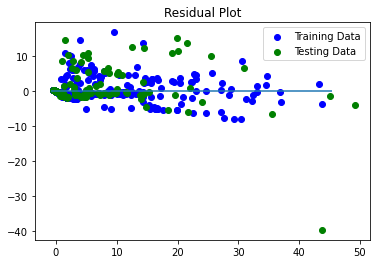

In [29]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), y_train - model.predict(X_train), c="blue", label="Training Data")
plt.scatter(model.predict(X_test), y_test - model.predict(X_test), c="green", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION